In [2]:
# Importing the libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.colors import ListedColormap
import seaborn as sns
import itertools
from itertools import combinations

import warnings

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from lightgbm.sklearn import LGBMRegressor
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import keras
import xgboost as xgb
import lightgbm as lgb
import keras
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(42)

Using TensorFlow backend.


In [3]:
# Importing the dataset
df_dummy = pd.read_csv('C:/Users/banva/Desktop/MSBA/Spring/Machine Learning/Bank Marketing Project/data_w_dummies.csv')
df_dummy.head()

FileNotFoundError: [Errno 2] File C:/Users/banva/Desktop/MSBA/Spring/Machine Learning/Bank Marketing Project/data_w_dummies.csv does not exist: 'C:/Users/banva/Desktop/MSBA/Spring/Machine Learning/Bank Marketing Project/data_w_dummies.csv'

In [ ]:
df_dummy.dtypes

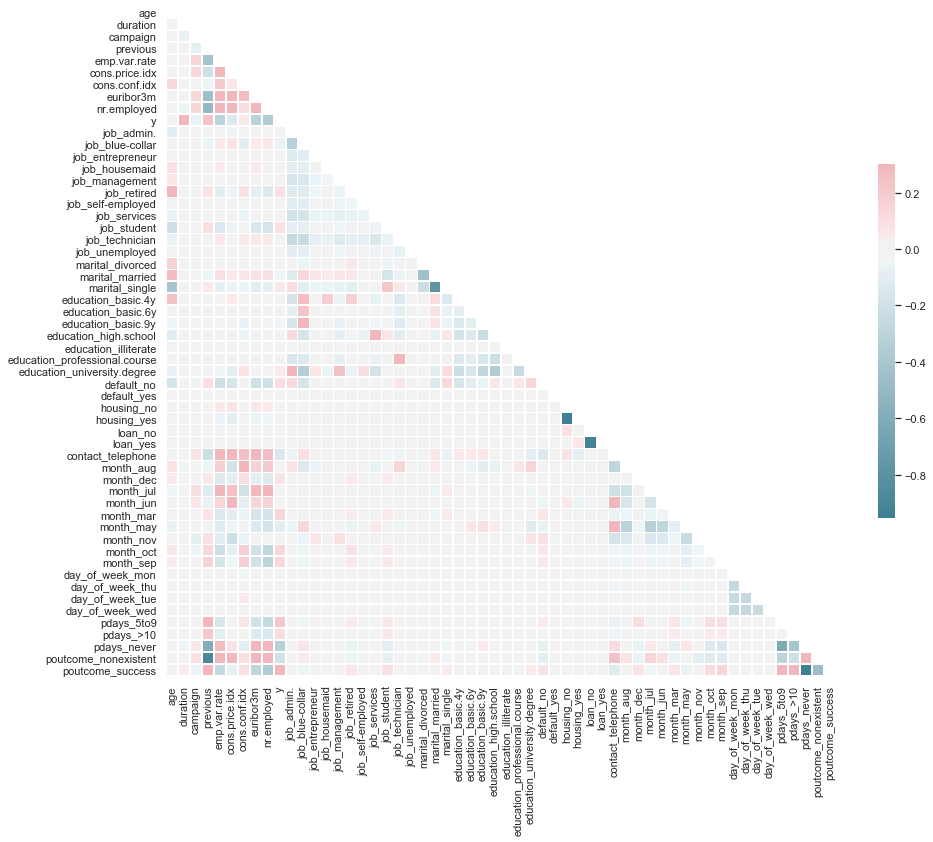

In [25]:
sns.set(style="white")

# Compute the correlation matrix
data=df_dummy
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [3]:
# data resampling to make positive : negative as 2:8

# get the distribution
count_0,count_1 = df_dummy.y.value_counts()

data_0 = df_dummy[df_dummy['y'] == 0]
data_1 = df_dummy[df_dummy['y'] == 1]

#Upsample data_1
data_1 = data_1.sample(int(count_1*2) ,replace=True, random_state=42)

# get the complete dataset
df = pd.concat([data_0 ,data_1] ,axis=0)

In [8]:
# retrieving Attributes
y = df.values[:,9]
X = df.drop(['y'],axis=1).values

In [16]:
X.shape

(45828, 55)

In [9]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Modelling

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [26]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
np.random.seed(42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state = 42) 
outer_cv = KFold(n_splits=5, shuffle=True, random_state = 42)

In [32]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Function to calculate accuracy and plot confusion matrix 
def cal_accuracy(y_test, y_pred): 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,classes=["1","0"],
                      title='Confusion matrix, without normalization')
    
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["1","0"], normalize=True,
                      title='Normalized confusion matrix')
    
    plt.show()

## ANN

In [19]:
#Initializing ANN
classifier = Sequential()
#Add input layer and Hidden layers to this sequential classifier
classifier.add(Dense(units = 10 , input_shape=(X_train_std .shape[1],) , init='uniform', activation='relu'  ))
#Add more layers
classifier.add(Dense(units = 10, init='uniform', activation='relu'))
#Add output layer
classifier.add(Dense(units = 1, activation='sigmoid'))
#If multiclass
#classifier.add(Dense(units = m, activation='softmax'))

C:\Users\banva\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, input_shape=(55,), activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\banva\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="relu", kernel_initializer="uniform")`
  


In [20]:
#let's compile
classifier.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics = ['accuracy'] )
#If multi class
#classifier.compile(optimizer='adam' ,loss='categorical_crossentropy' ,metrics = ['accuracy'] )

In [21]:
#Fit the model
classifier.fit(X_train_std, y_train, batch_size=20, nb_epoch=100)

C:\Users\banva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
36662/36662 [==============================] - 10s 270us/step - loss: 0.2773 - accuracy: 0.8717
Epoch 2/100
36662/36662 [==============================] - 10s 259us/step - loss: 0.2407 - accuracy: 0.8862
Epoch 3/100
36662/36662 [==============================] - 10s 268us/step - loss: 0.2356 - accuracy: 0.8896
Epoch 4/100
36662/36662 [==============================] - 9s 255us/step - loss: 0.2325 - accuracy: 0.8906
Epoch 5/100
36662/36662 [==============================] - 9s 255us/step - loss: 0.2293 - accuracy: 0.8939
Epoch 6/100
36662/36662 [==============================] - 9s 250us/step - loss: 0.2274 - accuracy: 0.8940
Epoch 7/100
36662/36662 [==============================] - 9s 258us/step - loss: 0.2259 - accuracy: 0.8948
Epoch 8/100
36662/36662 [==============================] - 9s 257us/step - loss: 0.2239 - accuracy: 0.8962
Epoch 9/100
36662/36662 [==============================] - 9s 249us/step - loss: 0.2229 - accuracy: 0.8964
Epoch 10/100
36662/36662 [========

In [34]:
y_pred=classifier.predict(X_test_std)
y_pred=(y_pred>0.7)

Accuracy :  87.94457778747545
Report :                precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      7342
         1.0       0.77      0.56      0.65      1824

    accuracy                           0.88      9166
   macro avg       0.83      0.76      0.79      9166
weighted avg       0.87      0.88      0.87      9166

Confusion matrix, without normalization
[[7042  300]
 [ 805 1019]]
Normalized confusion matrix
[[0.96 0.04]
 [0.44 0.56]]


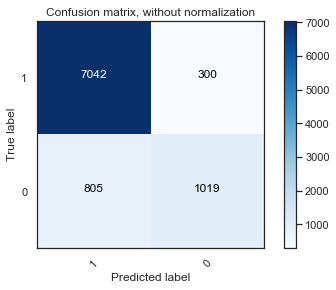

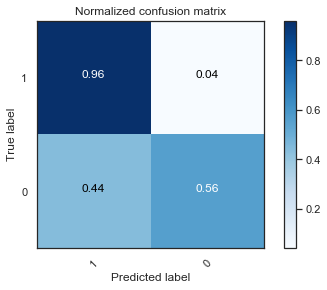

None


In [35]:
print(cal_accuracy(y_test, y_pred)) 

## Decision Tree

In [29]:
####################################### Decision Tree Model #####################################
from sklearn.tree import DecisionTreeClassifier 
param_test={'max_depth': [2,5,8,10,15],
                              'max_leaf_nodes': range(10,100,10),
                              'min_impurity_decrease': [0.1, 0.01, 0.001]}

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=param_test,
                  scoring='accuracy',
                  cv=inner_cv)

gs_dt = gs_dt.fit(X_train,y_train)
print(" Parameter Tuning for Decision Tree")
print("Non-nested CV f1: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs_dt.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score


 Parameter Tuning for Decision Tree
Non-nested CV f1:  0.8891768737591033
Optimal Parameter:  {'max_depth': 8, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.001}
Optimal Estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [30]:
nested_score_gs_dt = cross_val_score(gs_dt, X=X_train, y=y_train, cv=outer_cv) # the score is an array, score of the model in each outer  # for the best parameters
print("Nested CV f1: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

Nested CV f1:  0.8891768737591033  +/-  0.0014498040945386912


Accuracy :  89.37377263801004
Report :                precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      7342
         1.0       0.71      0.79      0.75      1824

    accuracy                           0.89      9166
   macro avg       0.83      0.86      0.84      9166
weighted avg       0.90      0.89      0.90      9166

Confusion matrix, without normalization
[[6749  593]
 [ 381 1443]]
Normalized confusion matrix
[[0.92 0.08]
 [0.21 0.79]]


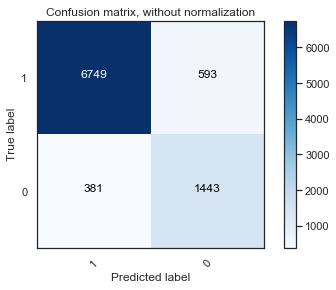

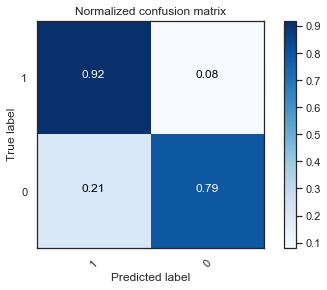

None


In [33]:
# DT Classifier
clf_dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

# Make predictions 
clf_dt = clf_dt.fit(X_train, y_train) 
y_pred = clf_dt.predict(X_test) 

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))  

## Logistic Regression

In [37]:
##################### Hyper parameters tuning for Logistic Regression#############

from sklearn.linear_model import LogisticRegression
np.random.seed(42)
import sys ,warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")  #To get rid of warnings
    
##################### 
param_test = {'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000],
                             'penalty':['l1','l2']}
GS_LR_F1 = GridSearchCV(estimator=LogisticRegression(random_state=42),
                  param_grid=param_test,
                  scoring='f1',
                  cv=inner_cv)

GS_LR_F1= GS_LR_F1.fit(X_train,y_train)
print("\n Parameter Tuning for logistic regression")
print()
print("Non-nested CV f1: ", GS_LR_F1.best_score_)
print()
print("Optimal Parameter: ",GS_LR_F1.best_params_)
print()
print("Optimal Estimator: ", GS_LR_F1.best_estimator_)
print()


 Parameter Tuning for logistic regression

Non-nested CV f1:  0.653870342837702

Optimal Parameter:  {'C': 100, 'penalty': 'l2'}

Optimal Estimator:  LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



Accuracy :  87.4536329914903
Report :                precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      7342
         1.0       0.73      0.59      0.65      1824

    accuracy                           0.87      9166
   macro avg       0.82      0.77      0.79      9166
weighted avg       0.87      0.87      0.87      9166

Confusion matrix, without normalization
[[6942  400]
 [ 750 1074]]
Normalized confusion matrix
[[0.95 0.05]
 [0.41 0.59]]


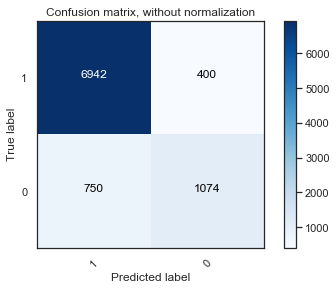

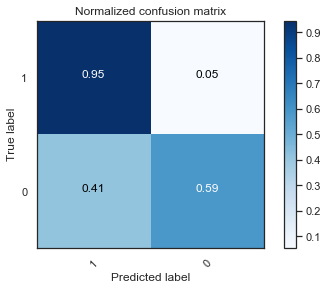

None


In [38]:
#Logistic Classifier
clf_lr = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Make predictions 
clf_lr = clf_lr.fit(X_train, y_train) 
y_pred = clf_lr.predict(X_test) 

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))  

## Naive Bayes

Accuracy :  79.3475889155575
Report :                precision    recall  f1-score   support

         0.0       0.92      0.81      0.86      7342
         1.0       0.49      0.73      0.58      1824

    accuracy                           0.79      9166
   macro avg       0.71      0.77      0.72      9166
weighted avg       0.84      0.79      0.81      9166

Confusion matrix, without normalization
[[5943 1399]
 [ 494 1330]]
Normalized confusion matrix
[[0.81 0.19]
 [0.27 0.73]]


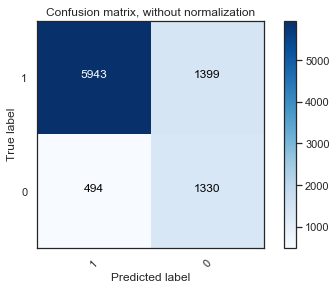

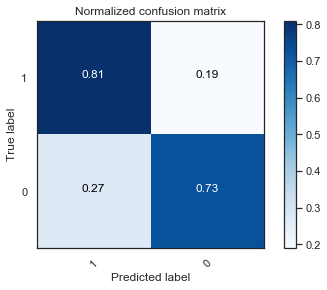

None


In [43]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_std,y_train)
y_pred= model.predict(X_test_std)

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))  

## Random Forest

In [45]:
################################# Random Forest Model ###################################
from sklearn.ensemble import RandomForestClassifier
gs_rf = GridSearchCV(estimator= RandomForestClassifier(random_state=42),
                  param_grid=[{'n_estimators':[50, 100, 200],
                               'max_depth': [1,3,5, 10, 20],
                               'min_impurity_decrease': [0.1, 0.01, 0.001],
                               'max_features': ['sqrt', 'log2', None]
                              }],
                  scoring='accuracy',
                  cv=inner_cv)

gs_rf = gs_rf.fit(X_train,y_train)
print(" Parameter Tuning for Decision Tree")
print("Non-nested CV f1: ", gs_rf.best_score_)
print("Optimal Parameter: ", gs_rf.best_params_)    
print("Optimal Estimator: ", gs_rf.best_estimator_) 

 Parameter Tuning for Decision Tree
Non-nested CV f1:  0.8926955316894706
Optimal Parameter:  {'max_depth': 10, 'max_features': None, 'min_impurity_decrease': 0.001, 'n_estimators': 100}
Optimal Estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


Accuracy :  89.5701505564041
Report :                precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      7342
         1.0       0.72      0.77      0.75      1824

    accuracy                           0.90      9166
   macro avg       0.83      0.85      0.84      9166
weighted avg       0.90      0.90      0.90      9166

Confusion matrix, without normalization
[[6798  544]
 [ 412 1412]]
Normalized confusion matrix
[[0.93 0.07]
 [0.23 0.77]]


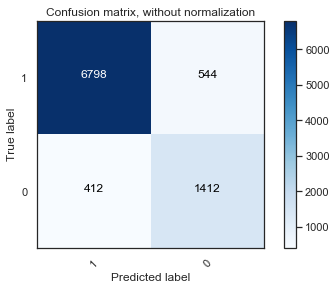

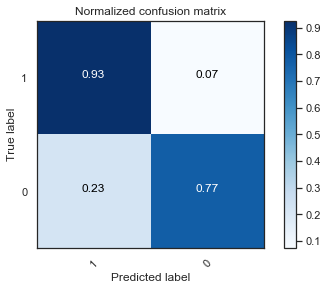

None


In [46]:
#Random forrest Classifier
clf_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Make predictions 
clf_rf = clf_rf.fit(X_train, y_train) 
y_pred = clf_rf.predict(X_test) 

# calculate accuracy and plot confusion matrix
print(cal_accuracy(y_test, y_pred))  

## ROC AUC

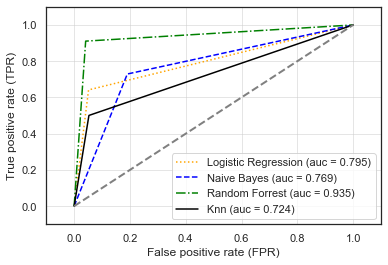

In [64]:
# Decision Tree Classifier
#clf_dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       #max_depth=8, max_features=None, max_leaf_nodes=20,
                       #min_impurity_decrease=0.001, min_impurity_split=None,
                       #min_samples_leaf=1, min_samples_split=2,
                       #min_weight_fraction_leaf=0.0, presort='deprecated',
                       #random_state=42, splitter='best')

# Logistic Regression 
clf_lr = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Naive Bayes Classifier
clf_nb = GaussianNB()

#Random Forrest classifier
clf_rf = RandomForestClassifier()

clf_knn =neighbors.KNeighborsClassifier(n_neighbors = 17)
                                        
# Label the classifiers
clf_labels = [ 'Logistic Regression', 'Naive Bayes' ,'Random Forrest' ,"Knn"]
all_clf = [ clf_lr, clf_nb, clf_rf ,clf_knn]

# visualization   
colors = [ 'orange', 'blue', 'green' ,'black','red' ]      # Colors for visualization
linestyles = [':', '--', '-.', '-'  ]        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    clf = clf.fit(X_train_std,y_train)
    y_pred = clf.predict(X_test_std)     
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()